* Note/Warning: the provided `diff_lag5` is the diff, at lag 5,
NOT the diff between current and lag 5!!!
    * I change it in the data her to "fix", so that `diff_lag5` is actually the diff between target and it's lag 5.
    
    * Same issue appleis to pct_diff_lag6

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("trends_v5.csv.gz",parse_dates=["Year","first","start"])

df = df[['Year', 'variable', 'y_raw', 'lag4',
         'lag5', 'lag6', 'first', 'start', 'year_num', 
#          'y_diff','y_pct_diff',
         "diff_lag5",'pct_diff_lag6'
        ]]
df

,Year,variable,y_raw,lag4,lag5,lag6,first,start,year_num,diff_lag5,pct_diff_lag6
0,1950-01-01,BLAST,17.484,48.209,34.125,0.000,1945-01-01 00:00:00,1950-01-01,1950,NaN,NaN
1,1951-01-01,BLAST,16.374,26.134,48.209,34.125,1945-01-01 00:00:00,1950-01-01,1951,NaN,NaN
2,1952-01-01,BLAST,26.807,39.572,26.134,48.209,1945-01-01 00:00:00,1950-01-01,1952,NaN,NaN
3,1953-01-01,BLAST,19.279,20.692,39.572,26.134,1945-01-01 00:00:00,1950-01-01,1953,NaN,NaN
4,1954-01-01,BLAST,17.934,17.484,20.692,39.572,1945-01-01 00:00:00,1950-01-01,1954,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
6903,2015-01-01,zebra fish,238.419,228.046,202.860,197.026,1948-01-01 00:00:00,1953-01-01,2015,5.834,0.042510
6904,2016-01-01,zebra fish,264.380,224.303,228.046,202.860,1948-01-01 00:00:00,1953-01-01,2016,25.186,0.029610
6905,2017-01-01,zebra fish,260.232,239.099,224.303,228.046,1948-01-01 00:00:00,1953-01-01,2017,-3.743,0.124155
6906,2018-01-01,zebra fish,273.093,235.448,239.099,224.303,1948-01-01 00:00:00,1953-01-01,2018,14.796,-0.016413


In [3]:
## fix target! 
df["diff_lag5"] = df["y_raw"].sub(df["lag5"])

In [4]:
df.select_dtypes(["number","O"]).head(8)

,variable,y_raw,lag4,lag5,lag6,first,year_num,diff_lag5,pct_diff_lag6
0,BLAST,17.484,48.209,34.125,0.000,1945-01-01 00:00:00,1950,-16.641,NaN
1,BLAST,16.374,26.134,48.209,34.125,1945-01-01 00:00:00,1951,-31.835,NaN
2,BLAST,26.807,39.572,26.134,48.209,1945-01-01 00:00:00,1952,0.673,NaN
3,BLAST,19.279,20.692,39.572,26.134,1945-01-01 00:00:00,1953,-20.293,NaN
4,BLAST,17.934,17.484,20.692,39.572,1945-01-01 00:00:00,1954,-2.758,NaN
5,BLAST,21.186,16.374,17.484,20.692,1945-01-01 00:00:00,1955,3.702,NaN
6,BLAST,18.689,26.807,16.374,17.484,1945-01-01 00:00:00,1956,2.315,0.000000
7,BLAST,11.656,19.279,26.807,16.374,1945-01-01 00:00:00,1957,-15.151,-0.063487


In [5]:
df.select_dtypes(["number","O"]).tail(8)

,variable,y_raw,lag4,lag5,lag6,first,year_num,diff_lag5,pct_diff_lag6
6900,zebra fish,224.303,188.992,175.808,165.871,1948-01-01 00:00:00,2012,48.495,0.077686
6901,zebra fish,239.099,197.026,188.992,175.808,1948-01-01 00:00:00,2013,50.107,0.059908
6902,zebra fish,235.448,202.860,197.026,188.992,1948-01-01 00:00:00,2014,38.422,0.074991
6903,zebra fish,238.419,228.046,202.860,197.026,1948-01-01 00:00:00,2015,35.559,0.042510
6904,zebra fish,264.380,224.303,228.046,202.860,1948-01-01 00:00:00,2016,36.334,0.029610
6905,zebra fish,260.232,239.099,224.303,228.046,1948-01-01 00:00:00,2017,35.929,0.124155
6906,zebra fish,273.093,235.448,239.099,224.303,1948-01-01 00:00:00,2018,33.994,-0.016413
6907,zebra fish,287.766,238.419,235.448,239.099,1948-01-01 00:00:00,2019,52.318,0.065964


In [6]:
df = df.sort_values("Year",ascending=True)

#### make binary trend target
* Could do regression in bins
* simpler - increase or not (+- by more than normal), in next ~ 5 Years

In [7]:
(df["y_raw"]-df["lag5"]).describe().round(3)

count    6908.000
mean       59.509
std       252.485
min     -2157.854
25%        -4.672
50%         6.382
75%        57.505
max      4048.101
dtype: float64

In [8]:
(df["y_raw"].div(df["lag5"])).describe().round(4)

count    6905.0000
mean           inf
std            NaN
min         0.0000
25%         0.9224
50%         1.1574
75%         1.6682
max            inf
dtype: float64

In [9]:
(df.loc[df["lag5"]>0]["y_raw"].div(df.loc[df["lag5"]>0]["lag5"])).describe().round(4)

count    6858.0000
mean        2.0070
std         5.0017
min         0.0000
25%         0.9214
50%         1.1527
75%         1.6459
max       162.9043
dtype: float64

count    4584.0000
mean        1.9491
std         5.4138
min         0.0000
25%         0.9248
50%         1.1121
75%         1.5025
max       162.9043
dtype: float64


<AxesSubplot:>

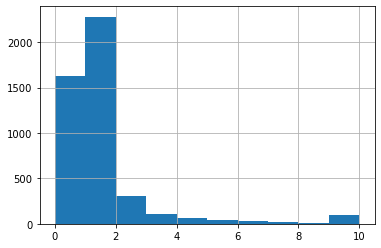

In [10]:
df_temp = df.loc[(df["lag5"]>0) & (df["year_num"]>=1980)]
print((df_temp["y_raw"].div(df_temp["lag5"])).describe().round(4))

(df_temp["y_raw"].div(df_temp["lag5"])).clip(upper=10).hist()

#### Over 10% increase within 5 Y
* Median changes over time in data, is around 1.15 in all, 1.11 after 1980

In [11]:
df["y_trend_115_5y"] = (df["y_raw"].div(df["lag5"]))>=1.15

In [12]:
df.head(7)

,Year,variable,y_raw,lag4,lag5,lag6,first,start,year_num,diff_lag5,pct_diff_lag6,y_trend_115_5y
0,1950-01-01,BLAST,17.484,48.209,34.125,0.0,1945-01-01 00:00:00,1950-01-01,1950,-16.641,NaN,False
4318,1950-01-01,lithium,20.981,12.979,9.750,0.0,1945-01-01 00:00:00,1950-01-01,1950,11.231,NaN,True
919,1950-01-01,Medulla oblongata,19.815,16.688,29.250,0.0,1945-01-01 00:00:00,1950-01-01,1950,-9.435,NaN,False
4655,1950-01-01,mouse,643.417,610.027,575.245,0.0,1945-01-01 00:00:00,1950-01-01,1950,68.172,NaN,False
4725,1950-01-01,multiple sclerosis,145.701,46.355,29.250,0.0,1945-01-01 00:00:00,1950-01-01,1950,116.451,NaN,True
4815,1950-01-01,natural medicine,27.975,38.938,4.875,0.0,1945-01-01 00:00:00,1950-01-01,1950,23.100,NaN,True
5050,1950-01-01,neuropeptide,636.423,53.771,39.000,0.0,1945-01-01 00:00:00,1950-01-01,1950,597.423,NaN,True


In [13]:
df["y_raw"].describe()

count     6908.000000
mean       553.394694
std       1193.924040
min          0.000000
25%         23.120750
50%        144.901000
75%        497.306250
max      11909.162000
Name: y_raw, dtype: float64

In [14]:
# df.loc[df["y_raw"]==0]

#### Divide by  moving average, of 'values' by 'group'
`df.groupby('group')['values'].transform(lambda x: x.rolling(3, 1).mean())`

In [15]:
df["mean"] = df.groupby('variable')['y_raw'].transform(lambda x: x.expanding().mean())
# df["mean"] = df.groupby(["variable"])["y_raw"].transform("mean")
df.drop_duplicates(["variable"])["mean"].describe()

count     125.000000
mean      126.265264
std       489.596562
min         0.000000
25%         2.322000
50%         9.128000
75%        61.252000
max      5080.893000
Name: mean, dtype: float64

In [16]:
df["y_sub_mean"] = df["y_raw"].sub(df["mean"])
df["y_div_mean"] = df["y_raw"].div(df["mean"]) ## may have infinite values! 

df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [17]:
df

,Year,variable,y_raw,lag4,lag5,lag6,first,start,year_num,diff_lag5,pct_diff_lag6,y_trend_115_5y,mean,y_sub_mean,y_div_mean
0,1950-01-01,BLAST,17.484,48.209,34.125,0.000,1945-01-01 00:00:00,1950-01-01,1950,-16.641,NaN,False,17.484000,0.000000,1.000000
4318,1950-01-01,lithium,20.981,12.979,9.750,0.000,1945-01-01 00:00:00,1950-01-01,1950,11.231,NaN,True,20.981000,0.000000,1.000000
919,1950-01-01,Medulla oblongata,19.815,16.688,29.250,0.000,1945-01-01 00:00:00,1950-01-01,1950,-9.435,NaN,False,19.815000,0.000000,1.000000
4655,1950-01-01,mouse,643.417,610.027,575.245,0.000,1945-01-01 00:00:00,1950-01-01,1950,68.172,NaN,False,643.417000,0.000000,1.000000
4725,1950-01-01,multiple sclerosis,145.701,46.355,29.250,0.000,1945-01-01 00:00:00,1950-01-01,1950,116.451,NaN,True,145.701000,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,2019-01-01,thalamus,151.904,159.688,156.385,170.039,1945-01-01 00:00:00,1950-01-01,2019,-4.481,0.047929,False,193.292100,-41.388100,0.785878
4478,2019-01-01,machine learning,895.311,261.243,200.521,167.256,1957-01-01 00:00:00,1968-01-01,2019,694.790,0.225570,True,69.156308,826.154692,12.946194
918,2019-01-01,MRI,3180.828,3288.157,3292.538,3345.907,1947-01-01 00:00:00,1964-01-01,2019,-111.710,0.015259,False,1722.546915,1458.281085,1.846584
747,2019-01-01,Histamine,94.905,108.076,117.558,132.726,1945-01-01 00:00:00,1950-01-01,2019,-22.653,-0.059701,False,389.425357,-294.520357,0.243705


In [18]:
df.drop(["diff_lag5",'pct_diff_lag6',"mean"],inplace=True,errors="ignore")

In [19]:
df.to_parquet("trends_altTargets_v6.parquet",index=False)